In [1]:
import gensim
import os
os.chdir("../Color-Names")
os.getcwd()
import numpy as np
import random

In [2]:
# Word2Vec downloaded from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing.
word2vec = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary = True)

In [3]:
f = open("sw-colors-name-csp-acb.acb", "r")
rgbs = {}
line = f.readline()
while line != "":
    if "colorName" in line:
        name = line.split(">")[1].split("(")[0].strip()
        rgb = {}
        line = f.readline()
        for color in ["r", "g", "b"]:
            line = f.readline()
            val = int(line.split(">")[1].split("<")[0])
            rgb[color] = val

        rgbs[name] = rgb

    line = f.readline()

f.close()


In [4]:
dim = word2vec.vector_size
max_tokens = max([len(name.split()) for name in rgbs])
avg_vector = np.mean(word2vec.vectors, axis=0)
empty_vector = np.zeros(dim)

(X_train, Y_train) = ([], [])


for name in rgbs:
    
    tokens = name.lower().split()
    x = [empty_vector] * max_tokens

    for i, token in enumerate(tokens):
        if token in word2vec:
            x[i] = word2vec[token]
        else:
            x[i] = avg_vector

    y = [rgbs[name][i] for i in ['r', 'g', 'b']]   
    
    X_train.append(np.array(x))
    Y_train.append(np.array(y))



# Add basic colour samples (repeat them to give them higher importance in learning)

basic_colours = {
    "Red": {"r": 255, "g": 0, "b": 0},
    "Blue": {"r": 0, "g": 0, "b": 255},
    "Green": {"r": 0, "g": 255, "b": 0},
    "Yellow": {"r": 255, "g": 255, "b": 0},
    "Magenta": {"r": 255, "g": 0, "b": 255},
    "Cyan": {"r": 0, "g": 255, "b": 255},
    "White": {"r": 255, "g": 255, "b": 255},
}
importance_weight = 25
for i in range(importance_weight):
    for colour in basic_colours:
        x = [empty_vector] * max_tokens
        x[0] = word2vec[colour]
        
        y = [basic_colours[colour][c] for c in ['r', 'g', 'b']]  
        
        X_train.append(np.array(x))
        Y_train.append(np.array(y))


In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

perm = np.random.permutation(len(X_train))
X_train = X_train[perm]
Y_train = Y_train[perm]

In [6]:
X_train.shape

(1701, 4, 300)

In [8]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPooling1D, Input
from keras.models import Model

ip = Input(shape=(max_tokens, dim), name='ip')
conv1 = Conv1D(128, 1, activation='tanh')(ip)
pool1 = GlobalMaxPooling1D()(conv1)
drop = Dropout(0.5)(pool1)
output = Dense(3)(drop)

model = Model(inputs = ip, outputs=output)

model.compile(loss = "mse", optimizer = "sgd")
checkpoint = ModelCheckpoint("model_params.h5", monitor = "val_loss", verbose = 1, save_best_only = True)
model.fit(X_train, Y_train, epochs = 500, validation_split = 0.1, callbacks = [checkpoint])
model.load_weights("model_params.h5")

Epoch 1/500
48/48 [==============================] - 1s 4ms/step - loss: 5767.3667 - val_loss: 3701.5549

Epoch 00001: val_loss improved from inf to 3701.55493, saving model to model_params.h5
Epoch 2/500
48/48 [==============================] - 0s 2ms/step - loss: 3770.1584 - val_loss: 2847.5286

Epoch 00002: val_loss improved from 3701.55493 to 2847.52856, saving model to model_params.h5
Epoch 3/500
48/48 [==============================] - 0s 1ms/step - loss: 3033.6206 - val_loss: 2738.7449

Epoch 00003: val_loss improved from 2847.52856 to 2738.74487, saving model to model_params.h5
Epoch 4/500
48/48 [==============================] - 0s 2ms/step - loss: 2742.9507 - val_loss: 2545.1501

Epoch 00004: val_loss improved from 2738.74487 to 2545.15015, saving model to model_params.h5
Epoch 5/500
48/48 [==============================] - 0s 2ms/step - loss: 2446.3511 - val_loss: 2599.3965

Epoch 00005: val_loss did not improve from 2545.15015
Epoch 6/500
48/48 [============================

48/48 [==============================] - 0s 1ms/step - loss: 1115.9070 - val_loss: 2173.9019

Epoch 00050: val_loss did not improve from 2027.13745
Epoch 51/500
48/48 [==============================] - 0s 1ms/step - loss: 1090.7593 - val_loss: 2248.5461

Epoch 00051: val_loss did not improve from 2027.13745
Epoch 52/500
48/48 [==============================] - 0s 1ms/step - loss: 1127.4755 - val_loss: 2179.9553

Epoch 00052: val_loss did not improve from 2027.13745
Epoch 53/500
48/48 [==============================] - 0s 1ms/step - loss: 1067.0439 - val_loss: 2090.9043

Epoch 00053: val_loss did not improve from 2027.13745
Epoch 54/500
48/48 [==============================] - 0s 1ms/step - loss: 1092.4802 - val_loss: 2327.1863

Epoch 00054: val_loss did not improve from 2027.13745
Epoch 55/500
48/48 [==============================] - 0s 1ms/step - loss: 1044.6398 - val_loss: 2153.2395

Epoch 00055: val_loss did not improve from 2027.13745
Epoch 56/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 889.2388 - val_loss: 2097.0610

Epoch 00101: val_loss did not improve from 2027.13745
Epoch 102/500
48/48 [==============================] - 0s 1ms/step - loss: 857.3591 - val_loss: 2126.3801

Epoch 00102: val_loss did not improve from 2027.13745
Epoch 103/500
48/48 [==============================] - 0s 2ms/step - loss: 884.2900 - val_loss: 2123.9121

Epoch 00103: val_loss did not improve from 2027.13745
Epoch 104/500
48/48 [==============================] - 0s 1ms/step - loss: 905.7383 - val_loss: 2098.5315

Epoch 00104: val_loss did not improve from 2027.13745
Epoch 105/500
48/48 [==============================] - 0s 1ms/step - loss: 911.3438 - val_loss: 2106.3862

Epoch 00105: val_loss did not improve from 2027.13745
Epoch 106/500
48/48 [==============================] - 0s 1ms/step - loss: 903.4473 - val_loss: 2187.9028

Epoch 00106: val_loss did not improve from 2027.13745
Epoch 107/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 796.2646 - val_loss: 2077.1611

Epoch 00152: val_loss did not improve from 2027.13745
Epoch 153/500
48/48 [==============================] - 0s 1ms/step - loss: 801.8916 - val_loss: 2147.1167

Epoch 00153: val_loss did not improve from 2027.13745
Epoch 154/500
48/48 [==============================] - 0s 2ms/step - loss: 820.9251 - val_loss: 2160.8853

Epoch 00154: val_loss did not improve from 2027.13745
Epoch 155/500
48/48 [==============================] - 0s 1ms/step - loss: 805.7606 - val_loss: 2120.1228

Epoch 00155: val_loss did not improve from 2027.13745
Epoch 156/500
48/48 [==============================] - 0s 1ms/step - loss: 810.4218 - val_loss: 2110.0408

Epoch 00156: val_loss did not improve from 2027.13745
Epoch 157/500
48/48 [==============================] - 0s 1ms/step - loss: 803.6052 - val_loss: 2162.5029

Epoch 00157: val_loss did not improve from 2027.13745
Epoch 158/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 744.4298 - val_loss: 2111.0002

Epoch 00203: val_loss did not improve from 2027.13745
Epoch 204/500
48/48 [==============================] - 0s 2ms/step - loss: 742.1783 - val_loss: 2179.8149

Epoch 00204: val_loss did not improve from 2027.13745
Epoch 205/500
48/48 [==============================] - 0s 1ms/step - loss: 742.7092 - val_loss: 2085.7104

Epoch 00205: val_loss did not improve from 2027.13745
Epoch 206/500
48/48 [==============================] - 0s 2ms/step - loss: 760.8244 - val_loss: 2063.6042

Epoch 00206: val_loss did not improve from 2027.13745
Epoch 207/500
48/48 [==============================] - 0s 1ms/step - loss: 748.4696 - val_loss: 2095.4270

Epoch 00207: val_loss did not improve from 2027.13745
Epoch 208/500
48/48 [==============================] - 0s 1ms/step - loss: 744.4840 - val_loss: 2161.4336

Epoch 00208: val_loss did not improve from 2027.13745
Epoch 209/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 713.1586 - val_loss: 2108.7378

Epoch 00254: val_loss did not improve from 2027.13745
Epoch 255/500
48/48 [==============================] - 0s 2ms/step - loss: 702.3082 - val_loss: 2136.1951

Epoch 00255: val_loss did not improve from 2027.13745
Epoch 256/500
48/48 [==============================] - 0s 1ms/step - loss: 736.0726 - val_loss: 2095.3044

Epoch 00256: val_loss did not improve from 2027.13745
Epoch 257/500
48/48 [==============================] - 0s 1ms/step - loss: 706.4510 - val_loss: 2063.8840

Epoch 00257: val_loss did not improve from 2027.13745
Epoch 258/500
48/48 [==============================] - 0s 1ms/step - loss: 717.4382 - val_loss: 2070.2188

Epoch 00258: val_loss did not improve from 2027.13745
Epoch 259/500
48/48 [==============================] - 0s 1ms/step - loss: 708.7730 - val_loss: 2101.0007

Epoch 00259: val_loss did not improve from 2027.13745
Epoch 260/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 713.5970 - val_loss: 2078.9990

Epoch 00305: val_loss did not improve from 2027.13745
Epoch 306/500
48/48 [==============================] - 0s 2ms/step - loss: 678.9130 - val_loss: 2161.8528

Epoch 00306: val_loss did not improve from 2027.13745
Epoch 307/500
48/48 [==============================] - 0s 1ms/step - loss: 693.1536 - val_loss: 2074.7957

Epoch 00307: val_loss did not improve from 2027.13745
Epoch 308/500
48/48 [==============================] - 0s 1ms/step - loss: 705.5820 - val_loss: 2091.4690

Epoch 00308: val_loss did not improve from 2027.13745
Epoch 309/500
48/48 [==============================] - 0s 1ms/step - loss: 691.5668 - val_loss: 2074.4622

Epoch 00309: val_loss did not improve from 2027.13745
Epoch 310/500
48/48 [==============================] - 0s 1ms/step - loss: 667.0649 - val_loss: 2114.5198

Epoch 00310: val_loss did not improve from 2027.13745
Epoch 311/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 647.7775 - val_loss: 2126.7793

Epoch 00355: val_loss did not improve from 2022.74377
Epoch 356/500
48/48 [==============================] - 0s 1ms/step - loss: 674.8207 - val_loss: 2146.3047

Epoch 00356: val_loss did not improve from 2022.74377
Epoch 357/500
48/48 [==============================] - 0s 1ms/step - loss: 695.4199 - val_loss: 2078.5608

Epoch 00357: val_loss did not improve from 2022.74377
Epoch 358/500
48/48 [==============================] - 0s 2ms/step - loss: 672.2978 - val_loss: 2038.2349

Epoch 00358: val_loss did not improve from 2022.74377
Epoch 359/500
48/48 [==============================] - 0s 1ms/step - loss: 700.5427 - val_loss: 2078.8577

Epoch 00359: val_loss did not improve from 2022.74377
Epoch 360/500
48/48 [==============================] - 0s 1ms/step - loss: 670.0131 - val_loss: 2118.3289

Epoch 00360: val_loss did not improve from 2022.74377
Epoch 361/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 654.3290 - val_loss: 2110.6257

Epoch 00406: val_loss did not improve from 2022.74377
Epoch 407/500
48/48 [==============================] - 0s 1ms/step - loss: 681.0138 - val_loss: 2119.3730

Epoch 00407: val_loss did not improve from 2022.74377
Epoch 408/500
48/48 [==============================] - 0s 2ms/step - loss: 665.3157 - val_loss: 2088.6069

Epoch 00408: val_loss did not improve from 2022.74377
Epoch 409/500
48/48 [==============================] - 0s 1ms/step - loss: 662.1252 - val_loss: 2065.2205

Epoch 00409: val_loss did not improve from 2022.74377
Epoch 410/500
48/48 [==============================] - 0s 2ms/step - loss: 680.3138 - val_loss: 2077.9158

Epoch 00410: val_loss did not improve from 2022.74377
Epoch 411/500
48/48 [==============================] - 0s 2ms/step - loss: 677.5853 - val_loss: 2071.6326

Epoch 00411: val_loss did not improve from 2022.74377
Epoch 412/500
48/48 [===========================

48/48 [==============================] - 0s 1ms/step - loss: 658.1564 - val_loss: 2131.1123

Epoch 00457: val_loss did not improve from 2022.74377
Epoch 458/500
48/48 [==============================] - 0s 2ms/step - loss: 652.0242 - val_loss: 2111.3110

Epoch 00458: val_loss did not improve from 2022.74377
Epoch 459/500
48/48 [==============================] - 0s 2ms/step - loss: 659.4519 - val_loss: 2133.4929

Epoch 00459: val_loss did not improve from 2022.74377
Epoch 460/500
48/48 [==============================] - 0s 2ms/step - loss: 654.3264 - val_loss: 2141.7891

Epoch 00460: val_loss did not improve from 2022.74377
Epoch 461/500
48/48 [==============================] - 0s 2ms/step - loss: 677.6243 - val_loss: 2145.3276

Epoch 00461: val_loss did not improve from 2022.74377
Epoch 462/500
48/48 [==============================] - 0s 1ms/step - loss: 669.0126 - val_loss: 2099.8044

Epoch 00462: val_loss did not improve from 2022.74377
Epoch 463/500
48/48 [===========================

In [15]:
from matplotlib import pyplot as plt

def display_colour(rgb):
    rgb = rgb.astype('float')

    rgb /= 255
    (h, w) = (64, 64)
    colour_swatch = np.zeros((h, w, 3))
    for row in range(h):
        for col in range(w):
            colour_swatch[row, col] = rgb

    plt.imshow(colour_swatch)
    plt.show()
    
def generate_colour(name):

    words = name.lower().split()
    X_test = np.zeros((max_tokens, dim))
    for (i, word) in enumerate(words):
        X_test[i] = word2vec[word]

    rgb = model.predict(np.array([X_test]))[0]
    print(type(rgb))
    display_colour(rgb)


<class 'numpy.ndarray'>


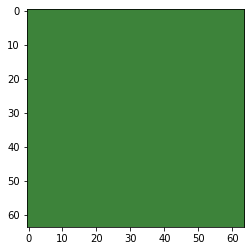

<class 'numpy.ndarray'>


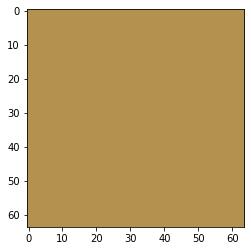

<class 'numpy.ndarray'>


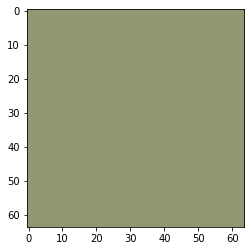

In [17]:
generate_colour("Green")
generate_colour("Booger Green")
generate_colour("Rainforest Green")

<class 'numpy.ndarray'>


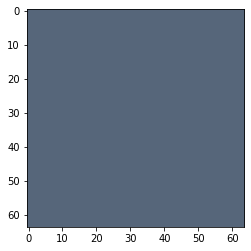

<class 'numpy.ndarray'>


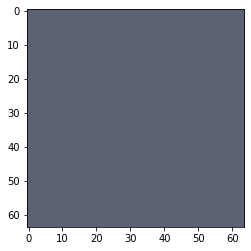

<class 'numpy.ndarray'>


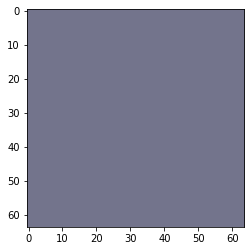

In [20]:
generate_colour("Purple")
generate_colour("Deep Purple")
generate_colour("Violet")

<class 'numpy.ndarray'>


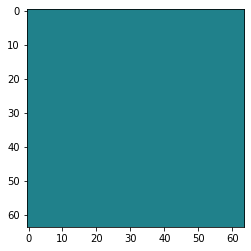

<class 'numpy.ndarray'>


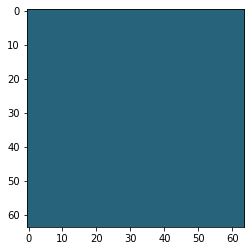

<class 'numpy.ndarray'>


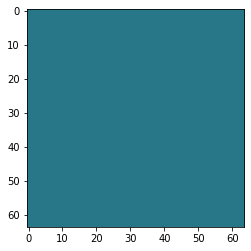

<class 'numpy.ndarray'>


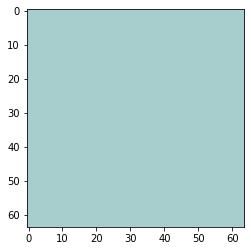

In [27]:
generate_colour("Blue")
generate_colour("Deep Blue")
generate_colour("Deep Ocean Blue")
generate_colour("Light Blue")